### Importing necessary libraries and the dataset

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

dataset = pd.read_csv('smartphones.csv')
print('The length of the dataset is : ' + str(len(dataset)))

The length of the dataset is : 1816


### Exploring the dataset

In [32]:
dataset.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


### There are total 8 columns 


* Smartphone: The unique identifier or full name of the smartphone.
* Brand: The brand of the smartphone.
* Model: Specific model name of the smartphone.
* RAM:The Amount of Memory in gigabytes.
* Storage: Internal storage capacity in gigabytes.
* Color: The color of the smartphone.
* Free: Indicates if the phone is attached to a cell company contract.
* Final Price: The final selling price in the respective currency.

In [33]:
missing_values = dataset.isnull().sum()
print(missing_values)

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64


There is missing values of Ram and storage

In [34]:
duplicate_rows = dataset.duplicated().sum()
print(duplicate_rows)

0


There is no duplicated rows

In [35]:
dataset['RAM'].fillna(dataset['RAM'].median(), inplace=True)
dataset['Storage'].fillna(dataset['Storage'].median(), inplace=True)

# Checking that there are nof missing values
dataset.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64

Since "RAM" and "Storage" is numeric value. I filled the missing values with the median.

In [36]:
dataset.drop('Smartphone', axis=1, inplace=True)

In [37]:
dataset.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


The "Smartphone" column is a redundant as its a combination of "Brand" and "Model"

### Exploratory data analysis

#### The distribution of smartphone brands

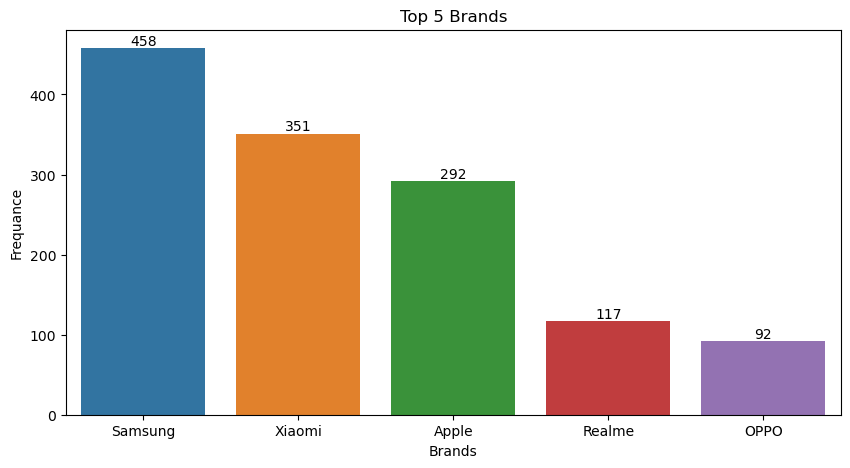

In [38]:
plt.figure(figsize=(10,5))
plt.title("Top 5 Brands")
figure = sns.barplot(x=dataset.Brand.value_counts()[0:5].index ,y= dataset.Brand.value_counts()[0:5].values)
for cotain in figure.containers : 
    figure.bar_label(cotain)
plt.xlabel("Brands")
plt.ylabel("Frequance")
plt.show()

Distribution of all Brands

In [39]:
print(pd.DataFrame(dataset.Brand.value_counts()))

            count
Brand            
Samsung       458
Xiaomi        351
Apple         292
Realme        117
OPPO           92
POCO           67
Motorola       57
Huawei         57
TCL            36
Cubot          34
Ulefone        30
Blackview      27
Vivo           27
Honor          27
OnePlus        22
Hammer         21
ZTE            17
Nokia          13
SPC            11
Google          9
Nothing         9
Alcatel         7
Crosscall       7
CAT             6
Gigaset         3
Qubo            3
Asus            3
Doro            3
Sony            2
Swissvoice      1
Maxcom          1
LG              1
BQ              1
Funker          1
Fairphone       1
Microsoft       1
Lenovo          1


### Which brands has the highest average price

In [40]:
print(dataset.groupby("Brand")["Final Price"].mean().sort_values(ascending=False)[:5])

Brand
Apple      842.396815
Lenovo     757.180000
Asus       751.573333
Nothing    657.748889
Samsung    639.754367
Name: Final Price, dtype: float64


### Checking if there is relation of Price with Ram and storage

In [41]:
correlation_matrix = dataset[['Final Price', 'RAM', 'Storage']].corr()


print(correlation_matrix)



             Final Price       RAM   Storage
Final Price     1.000000  0.442088  0.696851
RAM             0.442088  1.000000  0.413640
Storage         0.696851  0.413640  1.000000


Storage has a strong correlation with Final Price

### Checking the correlation between "Free" column and "Final Price"

In [42]:
dataset['Free'] = dataset['Free'].map({'Yes': 1, 'No': 0})
dataset.head()


,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme,C55,8.0,256.0,Yellow,1,231.60
1,Samsung,Galaxy M23,4.0,128.0,Blue,1,279.00
2,Motorola,Moto G13,4.0,128.0,Blue,1,179.01
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,1,279.99
4,Nothing,Phone (2),12.0,512.0,White,1,799.00


In [43]:
correlation_matrix = dataset[['Final Price', 'Free']].corr()


print(correlation_matrix)

             Final Price      Free
Final Price     1.000000 -0.044651
Free           -0.044651  1.000000


There is no significant correlation

#### Selecting "Ram" and "Storage" as features then store it to X variable.
#### Similarly, Y variable is holding targeted variable "Final Price"
#### Then, splited the dataset 80% training and 20% testing


In [44]:
X = dataset[['RAM', 'Storage']]  
y = dataset['Final Price']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1452, 2)
Test set size: (364, 2)


In [45]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training set MSE:", train_mse)
print("Test set MSE:", test_mse)


model.fit(X_train ,y_train)
y_pred = model.predict(X_test)
y_prdict_train =model.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print("R2 Score for train:", r2_train)
print("R2 Score for test:", r2_test)

Training set MSE: 74459.85572215143
Test set MSE: 88945.11622437261
R2 Score for train: 0.5072682049842757
R2 Score for test: 0.5276628622945794


#### In a Linear Regration model it is not performing well.There is room for improvement.

In [46]:
model2 =XGBRegressor ()

In [47]:
model2.fit(X_train ,y_train)
y_pred = model2.predict(X_test)
y_prdict_train =model2.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print("R2 Score for train:", r2_train)
print("R2 Score for test:", r2_test)

R2 Score for train: 0.5688487120578363
R2 Score for test: 0.606417756669323


#### In model2 R2 score is performing slightly better.However, it's not a perfect fit

### Instead of only using "RAM" and "Storage". I will also take "Brand", "Color" and "Model" as features for better accuracy

Calculating the normalized frequency of each brand in the dataset and adds a new column "brand_freq" containing these frequencies to the dataset.

In [48]:
brand_freq = dataset['Brand'].value_counts(normalize=True).to_dict()
dataset['brand_freq'] = dataset['Brand'].map(brand_freq)

Removing the column "Brand"

In [49]:
dataset.drop(columns=['Brand'] , inplace= True)

Same as above for "color", "Model" and "Free" column

In [50]:
color_freq = dataset['Color'].value_counts(normalize=True).to_dict()
dataset['color_freq'] = dataset['Color'].map(color_freq)
dataset.drop(columns=['Color'] , inplace= True)

In [51]:
model_freq = dataset['Free'].value_counts(normalize=True).to_dict()
dataset['Free_freq'] = dataset['Free'].map(model_freq)
dataset.drop(columns=['Free'] , inplace= True)

In [52]:
model_freq = dataset['Model'].value_counts(normalize=True).to_dict()
dataset['model_freq'] = dataset['Model'].map(model_freq)
dataset.drop(columns=['Model'] , inplace= True)

Performing one-hot encoding to create new binary columns

In [53]:
dataset = pd.get_dummies(dataset, columns=['RAM', 'Storage'], drop_first=True)

In [54]:
dataset.head()

,Final Price,brand_freq,color_freq,Free_freq,model_freq,RAM_2.0,RAM_3.0,RAM_4.0,RAM_6.0,RAM_8.0,...,Storage_4.0,Storage_8.0,Storage_12.0,Storage_16.0,Storage_32.0,Storage_64.0,Storage_128.0,Storage_256.0,Storage_512.0,Storage_1000.0
0,231.60,0.064427,0.013216,0.975771,0.001652,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,279.00,0.252203,0.186674,0.975771,0.002203,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,179.01,0.031388,0.186674,0.975771,0.001101,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,279.99,0.193282,0.107930,0.975771,0.003304,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,799.00,0.004956,0.093612,0.975771,0.002203,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [55]:
X = dataset.drop('Final Price', axis=1)
y = dataset['Final Price']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training set MSE:", train_mse)
print("Test set MSE:", test_mse)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 Score for train:", r2_train)
print("R2 Score for test:", r2_test)


Training set MSE: 49595.3741388934
Test set MSE: 71183.87370985023
R2 Score for train: 0.6718068080185196
R2 Score for test: 0.6219827621105347


The liner Regration model performs slightly better than the previous one

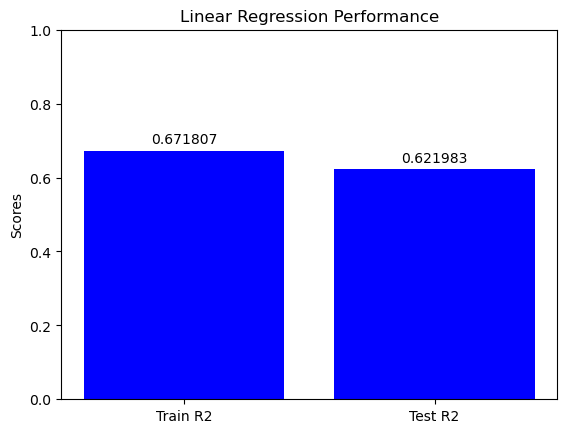

In [58]:

lr_metrics = ['Train R2', 'Test R2']
lr_values = [r2_train, r2_test] 

fig, ax = plt.subplots()
rects = ax.bar(lr_metrics, lr_values, color='blue')
ax.set_ylim(0, 1)

ax.set_ylabel('Scores')
ax.set_title('Linear Regression Performance')
ax.bar_label(rects, padding=3)

plt.show()


In [59]:
model2.fit(X_train ,y_train)
y_pred = model2.predict(X_test)
y_prdict_train =model2.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print("R2 Score for train: ",r2_train)
print("R2 Score for test: ",r2_test)


R2 Score for train:  0.9530605928482123
R2 Score for test:  0.758126797625932


Here, the testing data is performing slightly less than training data.However,the model still performs well on both data and
indicates a good generalisation on unseen data.

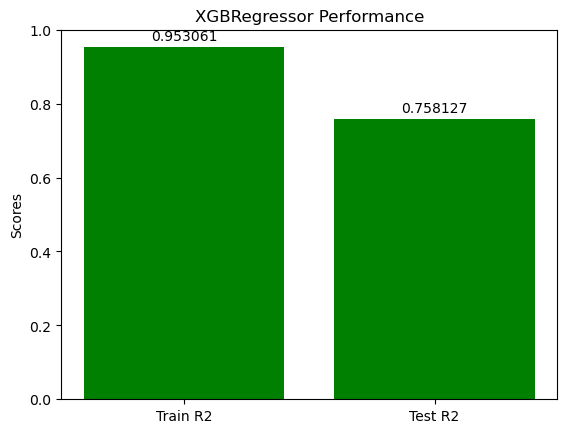

In [60]:
lr_metrics = ['Train R2', 'Test R2']
lr_values = [r2_train, r2_test] 


fig, ax = plt.subplots()
rects = ax.bar(lr_metrics, lr_values, color='green')
ax.set_ylim(0, 1)
ax.set_ylabel('Scores')
ax.set_title('XGBRegressor Performance')
ax.bar_label(rects, padding=3)

plt.show()